In [4]:
# Importando as bibliotecas necessarias
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fazendo upload do arquivo
uploaded = files.upload()

Saving join_clientes_agregados.csv to join_clientes_agregados (2).csv


In [5]:
df = pd.read_csv('/content/join_clientes_agregados.csv')
# Primeiras linhas
print("Primeiras 5 linhas:")
print(df.head())

# Informações do dataset
print("\nInformações do dataset:")
print(df.info())


Primeiras 5 linhas:
  cd_cliente,"uf","ds_segmento","ds_subsegmento","contrato_media","contrato_primeira_dt","contrato_ultima_dt","desde_data","mrr12m_max","mrr12m_avg","h_qtd","h_qtd_sum","h_vl_total_sum","h_prc_unitario_avg","h_desconto_pct_avg","npsr_qtd","npsr_media","npsr_promotores","npsr_detratores","npsr_ult_data","npsi_qtd","npsi_media","npsi_ult_data","nts_qtd","nts_media","nts_promotores","nts_detratores","ntp_qtd","ntp_media","ntp_linhas_distintas","ntp_ult_data"
0  99069,"SP","VAREJO","VAREJO","1353.46200724623...                                                                                                                                                                                                                                                                                                                                                                                                                       
1  99958,"SC","SERVICOS","PROVEDOR SERVICOS","204...        

In [6]:
# Lendo o arquivo
with open('join_clientes_agregados.csv', 'r', encoding='utf-8') as f:
    lines = [line.strip() for line in f.readlines()]

# Header corrigido (31 colunas)
header = [
    'cd_cliente', 'uf', 'ds_segmento', 'ds_subsegmento', 'contrato_media',
    'contrato_primeira_dt', 'contrato_ultima_dt', 'desde_data', 'mrr12m_max',
    'mrr12m_avg', 'h_qtd', 'h_qtd_sum', 'h_vl_total_sum', 'h_prc_unitario_avg',
    'h_desconto_pct_avg', 'npsr_qtd', 'npsr_media', 'npsr_promotores',
    'npsr_detratores', 'npsr_ult_data', 'npsi_qtd', 'npsi_media', 'npsi_ult_data',
    'nts_qtd', 'nts_media', 'nts_promotores', 'nts_detratores', 'ntp_qtd',
    'ntp_media', 'ntp_linhas_distintas', 'ntp_ult_data'
]

# Processando dados
data = []
for line in lines[1:]:
    clean_line = line.replace('"', '')
    fields = clean_line.split(',')
    # Garantindo que temos 31 campos (preenchendo com NaN se necessário)
    if len(fields) < 31:
        fields.extend([np.nan] * (31 - len(fields)))
    data.append(fields[:31])  # Pegando apenas as 31 colunas

# Criando DataFrame
df_agregados = pd.DataFrame(data, columns=header)

print("DATASET CARREGADO COM SUCESSO!")
print("Shape:", df_agregados.shape)
print(df_agregados.head())

DATASET CARREGADO COM SUCESSO!
Shape: (910, 31)
  cd_cliente  uf ds_segmento     ds_subsegmento      contrato_media  \
0      99069  SP      VAREJO             VAREJO  1353.4620072462371   
1      99958  SC    SERVICOS  PROVEDOR SERVICOS   204267.7721067391   
2      99999  SP       TOTVS              TOTVS  0.1199988723955067   
3     CARAMU  GO  MANUFATURA    BENS DE CONSUMO  42657.286896964615   
4     T00018  SP    SERVICOS            VIAGENS   20.51230164102767   

  contrato_primeira_dt contrato_ultima_dt  desde_data   mrr12m_max  \
0           2017-08-31         2023-06-06  2017-08-31         NULL   
1           2016-04-07         2016-04-07  2016-04-07         NULL   
2           2006-06-16         2023-01-02  2006-06-16         NULL   
3           2022-06-17         2022-06-17  2022-06-17  2070.736708   
4           2002-01-01         2015-09-02  2002-01-01         NULL   

    mrr12m_avg  ... npsi_media npsi_ult_data nts_qtd nts_media nts_promotores  \
0         NULL  ...    

In [7]:
# Colunas que devem ser numéricas
numeric_cols = [
    'contrato_media', 'mrr12m_max', 'mrr12m_avg', 'h_qtd', 'h_qtd_sum',
    'h_vl_total_sum', 'h_prc_unitario_avg', 'h_desconto_pct_avg',
    'npsr_qtd', 'npsr_media', 'npsi_qtd', 'npsi_media',
    'nts_qtd', 'nts_media', 'ntp_qtd', 'ntp_media', 'ntp_linhas_distintas'
]

# Colunas de data
date_cols = [
    'contrato_primeira_dt', 'contrato_ultima_dt', 'desde_data',
    'npsr_ult_data', 'npsi_ult_data', 'ntp_ult_data'
]

# Convertendo numéricas (tratando 'NULL' como NaN)
for col in numeric_cols:
    df_agregados[col] = pd.to_numeric(df_agregados[col], errors='coerce')

# Convertendo datas
for col in date_cols:
    df_agregados[col] = pd.to_datetime(df_agregados[col],format='%Y-%m-%d', errors='coerce')

print("CONVERSÕES REALIZADAS!")
print("\nTipos de dados:")
print(df_agregados.dtypes)

CONVERSÕES REALIZADAS!

Tipos de dados:
cd_cliente                      object
uf                              object
ds_segmento                     object
ds_subsegmento                  object
contrato_media                 float64
contrato_primeira_dt    datetime64[ns]
contrato_ultima_dt      datetime64[ns]
desde_data              datetime64[ns]
mrr12m_max                     float64
mrr12m_avg                     float64
h_qtd                          float64
h_qtd_sum                      float64
h_vl_total_sum                 float64
h_prc_unitario_avg             float64
h_desconto_pct_avg             float64
npsr_qtd                       float64
npsr_media                     float64
npsr_promotores                 object
npsr_detratores                 object
npsr_ult_data           datetime64[ns]
npsi_qtd                       float64
npsi_media                     float64
npsi_ult_data           datetime64[ns]
nts_qtd                        float64
nts_media               

In [8]:
print("ANÁLISE INICIAL:")

# Estatísticas básicas
print("\n1. ESTATÍSTICAS NUMÉRICAS:")
print(df_agregados[['mrr12m_avg', 'npsr_media', 'nts_media']].describe())

# Segmentos dos clientes
print("\n2. DISTRIBUIÇÃO POR SEGMENTO:")
segment_counts = df_agregados['ds_segmento'].value_counts()
print(segment_counts)

# Dados disponíveis (não nulos)
print("\n3. DADOS DISPONÍVEIS (não nulos):")
non_null_counts = df_agregados.count().sort_values(ascending=False)
print(non_null_counts.head(10))

# Clientes com maior MRR
print("\n4. TOP 10 CLIENTES POR MRR:")
top_mrr = df_agregados[df_agregados['mrr12m_avg'] > 0].nlargest(10, 'mrr12m_avg')
print(top_mrr[['cd_cliente', 'ds_segmento', 'mrr12m_avg', 'npsr_media']])

ANÁLISE INICIAL:

1. ESTATÍSTICAS NUMÉRICAS:
         mrr12m_avg  npsr_media   nts_media
count    821.000000  478.000000  559.000000
mean     908.174326    8.597280    8.829947
std     1201.189646    1.571648    1.815786
min        7.450636    0.000000    0.000000
25%      285.457679    8.000000    8.457500
50%      559.838166    9.000000    9.500000
75%     1055.428207   10.000000   10.000000
max    13611.998494   10.000000   16.000000

2. DISTRIBUIÇÃO POR SEGMENTO:
ds_segmento
MANUFATURA               386
SERVICOS                 134
VAREJO                    91
LOGISTICA                 78
CONSTRUCAO E PROJETOS     66
DISTRIBUICAO              54
EDUCACIONAL               43
SAUDE                     27
AGROINDUSTRIA             18
JURIDICO                   6
HOSPITALITY                5
TOTVS                      1
FINANCIAL SERVICES         1
Name: count, dtype: int64

3. DADOS DISPONÍVEIS (não nulos):
cd_cliente            910
uf                    910
ds_segmento           910


In [9]:
print("DIAGNÓSTICO COMPLETO DOS VALORES FALTANTES:")

# Análise detalhada dos valores ausentes
valores_ausentes = pd.DataFrame({
    'Valores_Faltantes': df_agregados.isnull().sum(),
    'Percentual_Faltante': (df_agregados.isnull().sum() / len(df_agregados) * 100).round(1),
    'Tipo_Dado': df_agregados.dtypes
}).sort_values('Percentual_Faltante', ascending=False)

print(valores_ausentes.head(20))

DIAGNÓSTICO COMPLETO DOS VALORES FALTANTES:
                      Valores_Faltantes  Percentual_Faltante       Tipo_Dado
npsi_qtd                            886                 97.4         float64
npsi_ult_data                       886                 97.4  datetime64[ns]
npsi_media                          886                 97.4         float64
ntp_ult_data                        486                 53.4  datetime64[ns]
ntp_media                           484                 53.2         float64
ntp_linhas_distintas                484                 53.2         float64
ntp_qtd                             483                 53.1         float64
h_qtd_sum                           474                 52.1         float64
h_vl_total_sum                      474                 52.1         float64
h_prc_unitario_avg                  474                 52.1         float64
h_desconto_pct_avg                  474                 52.1         float64
h_qtd                           

In [10]:
print("TRATAMENTO DE VALORES FALTANTES - ESTRATEGIA COMPLETA")

# Fazendo uma cópia para tratamento
df_tratado = df_agregados.copy()

# ANALISE INICIAL DOS FALTANTES
missing_inicial = df_tratado.isnull().sum()
total_faltantes_inicial = missing_inicial.sum()
print(f"Valores faltantes iniciais: {total_faltantes_inicial}")
print(f"Colunas com faltantes: {len(missing_inicial[missing_inicial > 0])}")

# CRIANDO FLAGS INDICADORAS PARA COLUNAS COM MAIS DE 20% FALTANTES
print("CRIANDO FLAGS INDICADORAS")

colunas_com_flags = [
    'npsi_qtd', 'npsi_ult_data', 'npsi_media',
    'ntp_ult_data', 'ntp_media', 'ntp_linhas_distintas', 'ntp_qtd',
    'h_qtd_sum', 'h_vl_total_sum', 'h_prc_unitario_avg', 'h_desconto_pct_avg', 'h_qtd',
    'npsr_ult_data', 'npsr_media', 'npsr_qtd',
    'nts_qtd', 'nts_media'
]

for col in colunas_com_flags:
    if col in df_tratado.columns:
        df_tratado[f'flag_{col}'] = df_tratado[col].notna().astype(int)
        print(f"   Flag criada para: {col}")

# TRATAMENTO POR CATEGORIA
print("APLICANDO TRATAMENTO")

# Convertendo colunas de data para datetime
colunas_data = [col for col in df_tratado.columns if 'data' in col or 'dt' in col]
for col in colunas_data:
    if col in df_tratado.columns:
        df_tratado[col] = pd.to_datetime(df_tratado[col], errors='coerce')

# Grupo A: Métricas Financeiras (MRR, Valor) - Preenchendo com mediana do segmento
colunas_financeiras = ['mrr12m_max', 'mrr12m_avg', 'contrato_media']
for col in colunas_financeiras:
    if col in df_tratado.columns:
        df_tratado[col] = df_tratado.groupby('ds_segmento')[col].transform(
            lambda x: x.fillna(x.median() if not pd.isna(x.median()) else 0)
        )

# Grupo B: Métricas de Satisfação (NPS) - Preenchendo com mediana do segmento
colunas_nps = [col for col in df_tratado.columns if 'nps' in col and df_tratado[col].dtype in [np.float64, np.int64]]
for col in colunas_nps:
    df_tratado[col] = df_tratado.groupby('ds_segmento')[col].transform(
        lambda x: x.fillna(x.median() if not pd.isna(x.median()) else 0)
    )

# Grupo C: Métricas de Histórico (h_) - Preenchendo com 0 (ausência de histórico)
colunas_historico = [col for col in df_tratado.columns if col.startswith('h_') and df_tratado[col].dtype in [np.float64, np.int64]]
for col in colunas_historico:
    df_tratado[col] = df_tratado[col].fillna(0)

# Grupo D: Métricas de Ticket (nts_) - Preenchendo com mediana geral
colunas_ticket = [col for col in df_tratado.columns if col.startswith('nts_') and df_tratado[col].dtype in [np.float64, np.int64]]
for col in colunas_ticket:
    df_tratado[col] = df_tratado[col].fillna(df_tratado[col].median() if not pd.isna(df_tratado[col].median()) else 0)

# Grupo E: Métricas de Produto (ntp_) - Preenchendo com 0
colunas_produto = [col for col in df_tratado.columns if col.startswith('ntp_') and df_tratado[col].dtype in [np.float64, np.int64]]
for col in colunas_produto:
    df_tratado[col] = df_tratado[col].fillna(0)

# Grupo F: Datas
for col in colunas_data:
    if col in df_tratado.columns:
        if 'ult_data' in col or 'ultima_dt' in col:
            # Datas recentes - preenchendo com data mais recente do segmento
            df_tratado[col] = df_tratado.groupby('ds_segmento')[col].transform(
                lambda x: x.fillna(x.max() if not pd.isna(x.max()) else pd.Timestamp('2024-01-01'))
            )
        else:
            # Datas antigas - preenchendo com data mais antiga do segmento
            df_tratado[col] = df_tratado.groupby('ds_segmento')[col].transform(
                lambda x: x.fillna(x.min() if not pd.isna(x.min()) else pd.Timestamp('2010-01-01'))
            )

# Grupo G: Colunas categóricas - Preenchendo com moda do segmento
colunas_categoricas = df_tratado.select_dtypes(include=['object']).columns
for col in colunas_categoricas:
    if col != 'ds_segmento':
        df_tratado[col] = df_tratado.groupby('ds_segmento')[col].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Nao Informado')
        )

# 4. TRATAMENTO RESIDUAL - Garantindo que não sobrou nenhum faltante
print("TRATAMENTO RESIDUAL")

missing_final = df_tratado.isnull().sum()
colunas_com_faltantes = missing_final[missing_final > 0]

if len(colunas_com_faltantes) == 0:
    print("   Todos os valores faltantes tratados com sucesso!")
else:
    print(f"   Tratando {len(colunas_com_faltantes)} colunas residuais:")
    for col, count in colunas_com_faltantes.items():
        print(f"   - {col}: {count} valores faltantes")
        if df_tratado[col].dtype in [np.float64, np.int64]:
            df_tratado[col] = df_tratado[col].fillna(0)
        elif df_tratado[col].dtype == 'datetime64[ns]':
            df_tratado[col] = df_tratado[col].fillna(pd.Timestamp('2020-01-01'))
        else:
            df_tratado[col] = df_tratado[col].fillna('Nao Informado')

TRATAMENTO DE VALORES FALTANTES - ESTRATEGIA COMPLETA
Valores faltantes iniciais: 9154
Colunas com faltantes: 21
CRIANDO FLAGS INDICADORAS
   Flag criada para: npsi_qtd
   Flag criada para: npsi_ult_data
   Flag criada para: npsi_media
   Flag criada para: ntp_ult_data
   Flag criada para: ntp_media
   Flag criada para: ntp_linhas_distintas
   Flag criada para: ntp_qtd
   Flag criada para: h_qtd_sum
   Flag criada para: h_vl_total_sum
   Flag criada para: h_prc_unitario_avg
   Flag criada para: h_desconto_pct_avg
   Flag criada para: h_qtd
   Flag criada para: npsr_ult_data
   Flag criada para: npsr_media
   Flag criada para: npsr_qtd
   Flag criada para: nts_qtd
   Flag criada para: nts_media
APLICANDO TRATAMENTO
TRATAMENTO RESIDUAL
   Todos os valores faltantes tratados com sucesso!


In [11]:
print("RESULTADOS FINAIS:")

missing_final_total = df_tratado.isnull().sum().sum()
print(f"Valores faltantes remanescentes: {missing_final_total}")

# Comparando métricas principais antes e depois
metricas_principais = ['mrr12m_avg', 'npsr_media', 'nts_media', 'contrato_media']

print("\nCOMPARATIVO ANTES/DEPOIS DO TRATAMENTO:")
print("METRICA          |   ANTES   |   DEPOIS  |  VARIACAO")
print("-" * 50)

for metrica in metricas_principais:
    if metrica in df_agregados.columns and metrica in df_tratado.columns:
        antes = df_agregados[metrica].mean()
        depois = df_tratado[metrica].mean()
        variacao = ((depois - antes) / antes * 100) if antes != 0 else 0

        print(f"{metrica:15s} | {antes:8.2f} | {depois:8.2f} | {variacao:+.2f}%")

# Analisando as flags criadas
flags = [col for col in df_tratado.columns if 'flag_' in col]
print(f"\nFLAGS CRIADAS (indicam dados originais):")
for flag in flags:
    col_original = flag.replace('flag_', '')
    # Verificando se a flag é numérica
    if df_tratado[flag].dtype in [np.int64, np.float64]:
        percentual_preenchido = (df_tratado[flag].sum() / len(df_tratado) * 100)
        print(f"   - {col_original}: {percentual_preenchido:.1f}% dos clientes tinham dados originais")
    else:
        # Para flags não numéricas, contagem simples
        percentual_preenchido = (df_tratado[flag].notna().sum() / len(df_tratado) * 100)
        print(f"   - {col_original}: {percentual_preenchido:.1f}% dos clientes tinham dados originais")

print(f"\nDATASET FINAL: {df_tratado.shape[0]} linhas × {df_tratado.shape[1]} colunas")
print("TRATAMENTO CONCLUIDO COM SUCESSO!")

RESULTADOS FINAIS:
Valores faltantes remanescentes: 0

COMPARATIVO ANTES/DEPOIS DO TRATAMENTO:
METRICA          |   ANTES   |   DEPOIS  |  VARIACAO
--------------------------------------------------
mrr12m_avg      |   908.17 |   870.70 | -4.13%
npsr_media      |     8.60 |     8.65 | +0.66%
nts_media       |     8.83 |     9.09 | +2.93%
contrato_media  |  3838.82 |  3829.91 | -0.23%

FLAGS CRIADAS (indicam dados originais):
   - npsi_qtd: 2.6% dos clientes tinham dados originais
   - npsi_ult_data: 100.0% dos clientes tinham dados originais
   - npsi_media: 2.6% dos clientes tinham dados originais
   - ntp_ult_data: 100.0% dos clientes tinham dados originais
   - ntp_media: 46.8% dos clientes tinham dados originais
   - ntp_linhas_distintas: 46.8% dos clientes tinham dados originais
   - ntp_qtd: 46.9% dos clientes tinham dados originais
   - h_qtd_sum: 47.9% dos clientes tinham dados originais
   - h_vl_total_sum: 47.9% dos clientes tinham dados originais
   - h_prc_unitario_avg: 47.

In [12]:
# Selecionando apenas as variáveis numéricas contínuas para o clustering
# Excluindo colunas não numéricas e as flags criadas
variaveis_numericas = df_tratado.select_dtypes(include=[np.float64, np.int64]).columns

# Removendo colunas que não devem ser usadas no clustering (flags, IDs, etc.)
colunas_remover = [col for col in variaveis_numericas if 'flag_' in col or 'id_' in col or 'rowid' in col]
variaveis_clustering = [col for col in variaveis_numericas if col not in colunas_remover]

print(f"Variáveis selecionadas para clustering: {len(variaveis_clustering)}")
print(variaveis_clustering)

# Aplicando StandardScaler apenas nas variáveis selecionadas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_scaled = scaler.fit_transform(df_tratado[variaveis_clustering])

# Criando DataFrame com dados padronizados
df_scaled = pd.DataFrame(dados_scaled, columns=variaveis_clustering, index=df_tratado.index)

print("Dados padronizados com StandardScaler")
print(f"Shape dos dados para clustering: {df_scaled.shape}")

Variáveis selecionadas para clustering: 17
['contrato_media', 'mrr12m_max', 'mrr12m_avg', 'h_qtd', 'h_qtd_sum', 'h_vl_total_sum', 'h_prc_unitario_avg', 'h_desconto_pct_avg', 'npsr_qtd', 'npsr_media', 'npsi_qtd', 'npsi_media', 'nts_qtd', 'nts_media', 'ntp_qtd', 'ntp_media', 'ntp_linhas_distintas']
Dados padronizados com StandardScaler
Shape dos dados para clustering: (910, 17)


In [13]:
from scipy.stats import trim_mean

# Tratamento de outliers para todas as variáveis
for col in variaveis_clustering:
    # Calculando limites  usando IQR (mais resistente a outliers)
    Q1 = df_tratado[col].quantile(0.25)
    Q3 = df_tratado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorization: limitando outliers aos limites, sem remover
    df_tratado[col] = np.where(df_tratado[col] < lower_bound, lower_bound, df_tratado[col])
    df_tratado[col] = np.where(df_tratado[col] > upper_bound, upper_bound, df_tratado[col])

# Reaplicando StandardScaler NAS VARIÁVEIS TRATADAS
dados_scaled = scaler.fit_transform(df_tratado[variaveis_clustering])
df_scaled = pd.DataFrame(dados_scaled, columns=variaveis_clustering, index=df_tratado.index)

In [35]:
from sklearn.cluster import KMeans

def soma_quadrados_intra_clusters(dataset):
    wcss = []
    for n in range(2, 22):
        kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
        kmeans.fit(dataset)
        wcss.append(kmeans.inertia_)

    return wcss

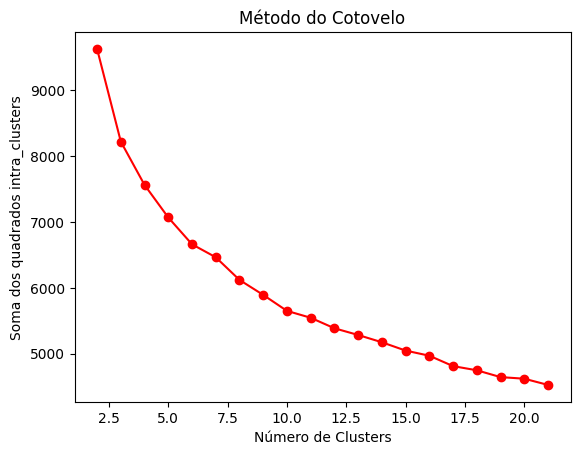

In [36]:
import matplotlib.pyplot as plt
import pylab as pl

n_clusters = list(range(2,22))
somas = soma_quadrados_intra_clusters(df_scaled)
pl.plot(n_clusters, somas, '-o', color='red')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra_clusters')
plt.title('Método do Cotovelo')
plt.show()

In [21]:
# --- Início da Clusterização K-Means ---

from sklearn.cluster import KMeans

n_clusters = 3

print(f"\nAplicando K-Means com {n_clusters} clusters...")

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Atribuindo os clusters aos dados padronizados (SEM PCA)
df_tratado['cluster'] = kmeans.fit_predict(df_scaled)

print("Clusterização K-Means concluída.")
print("Distribuição dos clientes por cluster:")
print(df_tratado['cluster'].value_counts().sort_index())


Aplicando K-Means com 3 clusters...
Clusterização K-Means concluída.
Distribuição dos clientes por cluster:
cluster
0    413
1    238
2    259
Name: count, dtype: int64


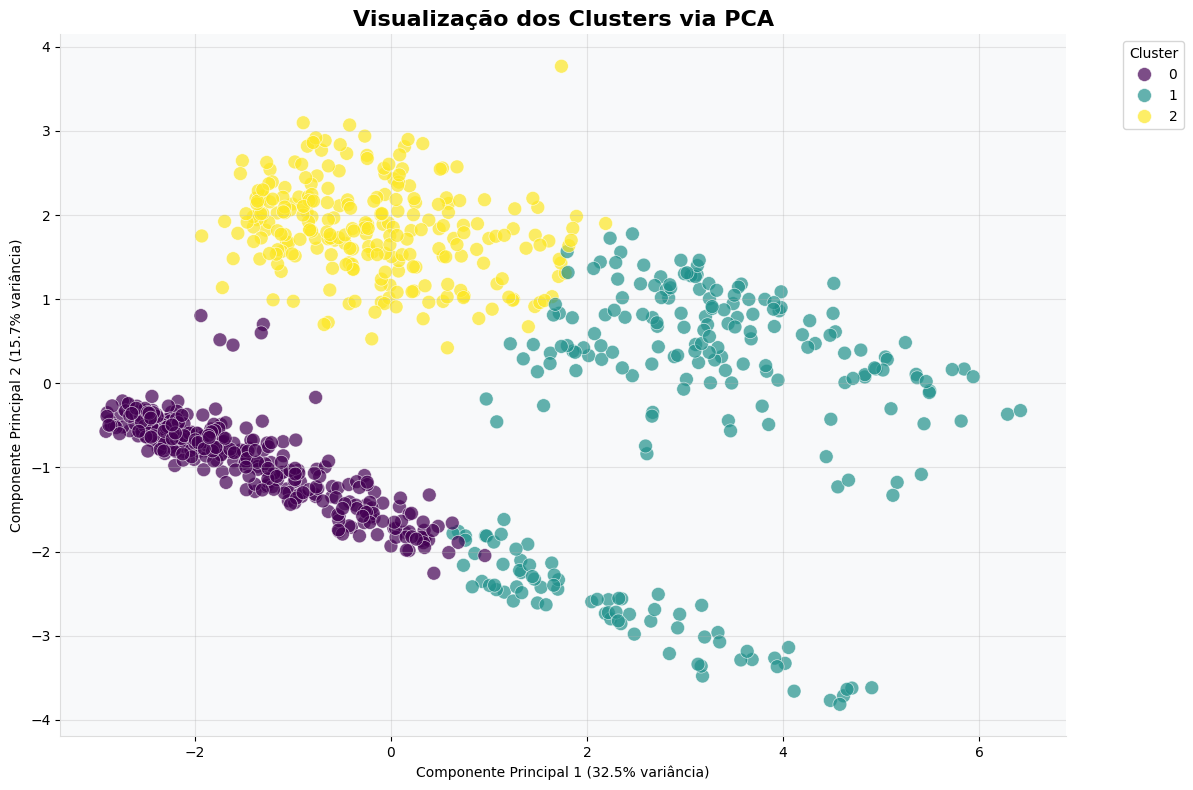

════════════════════════════════════════════════════════════
ANÁLISE PCA - RESULTADOS
════════════════════════════════════════════════════════════
Variância explicada PC1: 32.5%
Variância explicada PC2: 15.7%
Variância total explicada: 48.2%
Número de clusters: 3


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

# Aplicando PCA para visualização 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Criando DataFrame para visualização
df_visualizacao = pd.DataFrame(
    {'Componente Principal 1': pca_result[:, 0],
     'Componente Principal 2': pca_result[:, 1],
     'Cluster': df_tratado['cluster']}
)

# Gráfico de dispersão PCA
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='Componente Principal 1',
    y='Componente Principal 2',
    hue='Cluster',
    palette='viridis',
    data=df_visualizacao,
    s=100,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)

plt.title('Visualização dos Clusters via PCA', fontsize=16, fontweight='bold')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variância)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variância)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Adicionando box
plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['left', 'bottom']].set_color('#ddd')

plt.tight_layout()
plt.show()

print(f"═" * 60)
print("ANÁLISE PCA - RESULTADOS")
print(f"═" * 60)
print(f"Variância explicada PC1: {pca.explained_variance_ratio_[0]*100:.1f}%")
print(f"Variância explicada PC2: {pca.explained_variance_ratio_[1]*100:.1f}%")
print(f"Variância total explicada: {sum(pca.explained_variance_ratio_)*100:.1f}%")
print(f"Número de clusters: {len(df_tratado['cluster'].unique())}")

In [23]:
# Verificando os cclusters que já foram calculados
print("Clusters existentes:", 'cluster' in df_tratado.columns)

# Dimensionalidade dos dados
print("Shape do df_scaled:", df_scaled.shape)

# # 4. Se persistir, tente aumentar componentes PCA:
# pca = PCA(n_components=0.85)  # Captura 85% da variância
# pca_result = pca.fit_transform(df_scaled)
# print("Número de componentes para 85% variância:", pca.n_components_)

Clusters existentes: True
Shape do df_scaled: (910, 17)


In [24]:
# Verificando clusters únicos e suas contagens
clusters_unicos = sorted(df_tratado['cluster'].unique())
contagens = df_tratado['cluster'].value_counts().sort_index()

print("Perfil dos Clusters (Médias das Features por Cluster):")

# Usando apenas os clusters que realmente existem
for cluster_num in sorted(clusters_unicos):
    print(f"\n CLUSTER {cluster_num}:")
    cluster_data = df_tratado[df_tratado['cluster'] == cluster_num]

    # Calculando médias apenas para variáveis numéricas (excluindo a coluna cluster)
    numeric_cols = cluster_data.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col != 'cluster']

    cluster_means = cluster_data[numeric_cols].mean()
    overall_means = df_tratado[numeric_cols].mean()

    # Mostrando as 5 variáveis mais diferentes da média geral
    diferencas = (cluster_means - overall_means).abs()
    top_5 = diferencas.nlargest(5)

    for var in top_5.index:
        valor_cluster = cluster_means[var]
        valor_geral = overall_means[var]
        diff_pct = ((valor_cluster - valor_geral) / valor_geral * 100) if valor_geral != 0 else 0
        print(f"   {var}: {valor_cluster:.2f} (vs média {valor_geral:.2f}, {diff_pct:+.1f}%)")

# Tamanho de cada cluster
print(f"\nTAMANHO DOS CLUSTERS:")
for cluster_num in sorted(clusters_unicos):
    tamanho = len(df_tratado[df_tratado['cluster'] == cluster_num])
    print(f"   Cluster {cluster_num}: {tamanho} clientes ({tamanho/len(df_tratado)*100:.1f}%)")

Perfil dos Clusters (Médias das Features por Cluster):

 CLUSTER 0:
   h_vl_total_sum: 1026.43 (vs média 5042.16, -79.6%)
   contrato_media: 1303.44 (vs média 1820.21, -28.4%)
   h_prc_unitario_avg: 214.45 (vs média 582.54, -63.2%)
   mrr12m_max: 535.83 (vs média 721.49, -25.7%)
   mrr12m_avg: 537.33 (vs média 722.90, -25.7%)

 CLUSTER 1:
   h_vl_total_sum: 16304.38 (vs média 5042.16, +223.4%)
   contrato_media: 3035.92 (vs média 1820.21, +66.8%)
   h_prc_unitario_avg: 1600.61 (vs média 582.54, +174.8%)
   mrr12m_avg: 1198.53 (vs média 722.90, +65.8%)
   mrr12m_max: 1196.48 (vs média 721.49, +65.8%)

 CLUSTER 2:
   h_vl_total_sum: 1096.57 (vs média 5042.16, -78.3%)
   h_prc_unitario_avg: 233.96 (vs média 582.54, -59.8%)
   contrato_media: 1527.12 (vs média 1820.21, -16.1%)
   mrr12m_avg: 581.72 (vs média 722.90, -19.5%)
   mrr12m_max: 581.08 (vs média 721.49, -19.5%)

TAMANHO DOS CLUSTERS:
   Cluster 0: 413 clientes (45.4%)
   Cluster 1: 238 clientes (26.2%)
   Cluster 2: 259 clientes 

In [25]:
print("TESTE ESTATÍSTICO ANOVA - SIGNIFICÂNCIA")

from scipy import stats

variaveis_analise = ['h_vl_total_sum', 'h_prc_unitario_avg', 'mrr12m_avg', 'contrato_media',
                     'nts_media', 'npsr_media', 'h_qtd_sum', 'ntp_media']

print("Variáveis analisadas:")
for var in variaveis_analise:
    if var in df_tratado.columns:
        # Criando grupos para cada cluster
        grupos = []
        for cluster_num in clusters_unicos:
            grupo = df_tratado[df_tratado['cluster'] == cluster_num][var]
            grupos.append(grupo)

        # Teste ANOVA
        f_stat, p_value = stats.f_oneway(*grupos)

        significancia = "SIGNIFICATIVO" if p_value < 0.05 else "NÃO SIGNIFICATIVO"
        print(f"{var:20s}: p-value = {p_value:.6f} - {significancia}")

TESTE ESTATÍSTICO ANOVA - SIGNIFICÂNCIA
Variáveis analisadas:
h_vl_total_sum      : p-value = 0.000000 - SIGNIFICATIVO
h_prc_unitario_avg  : p-value = 0.000000 - SIGNIFICATIVO
mrr12m_avg          : p-value = 0.000000 - SIGNIFICATIVO
contrato_media      : p-value = 0.000000 - SIGNIFICATIVO
nts_media           : p-value = 0.000004 - SIGNIFICATIVO
npsr_media          : p-value = 0.001257 - SIGNIFICATIVO
h_qtd_sum           : p-value = 0.000000 - SIGNIFICATIVO
ntp_media           : p-value = 0.000000 - SIGNIFICATIVO


POST HOC

VARIÁVEL: NPSR_MEDIA
----------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.1639 0.0689 -0.3374 0.0097  False
     0      2   0.1351  0.146 -0.0339 0.3042  False
     1      2    0.299 0.0008  0.1075 0.4905   True
---------------------------------------------------


<Figure size 1000x600 with 0 Axes>

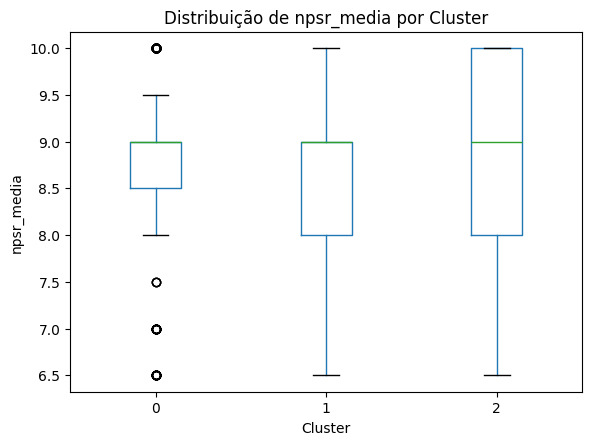


VARIÁVEL: MRR12M_AVG
----------------------------------------
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1  661.1978    0.0  568.3908  754.0047   True
     0      2   44.3845 0.4819   -46.004  134.7731  False
     1      2 -616.8132    0.0 -719.2117 -514.4148   True
---------------------------------------------------------


<Figure size 1000x600 with 0 Axes>

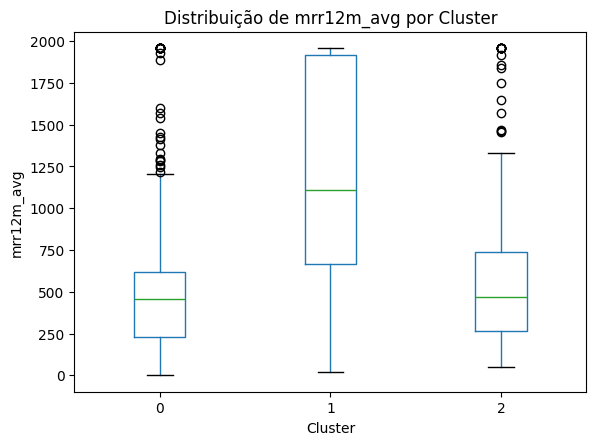


VARIÁVEL: CONTRATO_MEDIA
----------------------------------------
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     0      1  1732.4846    0.0  1459.2002   2005.769   True
     0      2   223.6833 0.1195   -42.4796   489.8463  False
     1      2 -1508.8012    0.0 -1810.3293 -1207.2732   True
------------------------------------------------------------


<Figure size 1000x600 with 0 Axes>

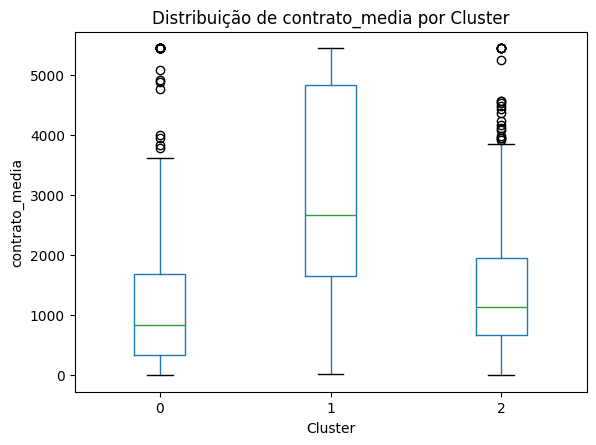


VARIÁVEL: NTS_MEDIA
----------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.2258    0.0 -0.3359 -0.1158   True
     0      2  -0.1441 0.0047 -0.2513 -0.0369   True
     1      2   0.0817 0.2548 -0.0397  0.2032  False
----------------------------------------------------


<Figure size 1000x600 with 0 Axes>

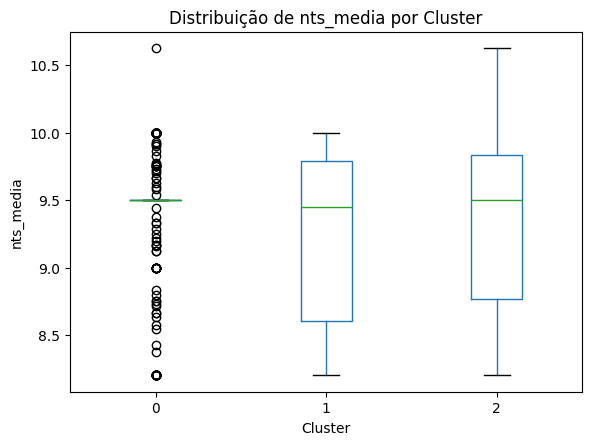

PERFIL DOS CLUSTERS (Médias Z-score):
Médias padronizadas (Z-score) por cluster:
         npsr_media  mrr12m_avg  contrato_media  nts_media
cluster                                                   
0              0.06       -0.64           -0.69       1.08
1             -1.03        1.15            1.15      -0.90
2              0.97       -0.52           -0.45      -0.18


In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

# Identificando variaáveis significativas da Anova
variaveis_posthoc = ['npsr_media', 'mrr12m_avg', 'contrato_media', 'nts_media']

print("POST HOC")
for var in variaveis_posthoc:
    if var in df_tratado.columns:
        print(f"\nVARIÁVEL: {var.upper()}")
        print("-" * 40)

        # Executando teste de pos hoc
        tukey = pairwise_tukeyhsd(endog=df_tratado[var],
                                  groups=df_tratado['cluster'],
                                  alpha=0.05)

        print(tukey.summary())

        # Análise visual das diferenças
        plt.figure(figsize=(10, 6))
        df_tratado.boxplot(column=var, by='cluster', grid=False)
        plt.title(f'Distribuição de {var} por Cluster')
        plt.suptitle('')
        plt.ylabel(var)
        plt.xlabel('Cluster')
        plt.show()

# Análizando so perfis dos clusters (Médias)
print("PERFIL DOS CLUSTERS (Médias Z-score):")

cluster_means = df_tratado.groupby('cluster')[variaveis_posthoc].mean()
cluster_std = df_tratado.groupby('cluster')[variaveis_posthoc].std()

# Calculando Z-scores para comparar magnitudes
z_scores = (cluster_means - cluster_means.mean()) / cluster_means.std()

print("Médias padronizadas (Z-score) por cluster:")
print(z_scores.round(2))


In [27]:
print("RESUMO INTERPRETATIVO:")

for cluster in z_scores.index:
    print(f"\nCLUSTER {cluster}:")
    highs = z_scores.loc[cluster][z_scores.loc[cluster] > 0.5]  # > 0.5 Z-score
    lows = z_scores.loc[cluster][z_scores.loc[cluster] < -0.5]  # < -0.5 Z-score

    if len(highs) > 0:
        print(f"  ↑ ALTO em: {', '.join([f'{v} (Z={z_scores.loc[cluster][v]:.2f})' for v in highs.index])}")
    if len(lows) > 0:
        print(f"  ↓ BAIXO em: {', '.join([f'{v} (Z={z_scores.loc[cluster][v]:.2f})' for v in lows.index])}")

RESUMO INTERPRETATIVO:

CLUSTER 0:
  ↑ ALTO em: nts_media (Z=1.08)
  ↓ BAIXO em: mrr12m_avg (Z=-0.64), contrato_media (Z=-0.69)

CLUSTER 1:
  ↑ ALTO em: mrr12m_avg (Z=1.15), contrato_media (Z=1.15)
  ↓ BAIXO em: npsr_media (Z=-1.03), nts_media (Z=-0.90)

CLUSTER 2:
  ↑ ALTO em: npsr_media (Z=0.97)
  ↓ BAIXO em: mrr12m_avg (Z=-0.52)


In [28]:
print("ANÁLISE DETALHADA POR CLUSTER")

for cluster_num in clusters_unicos:
    cluster_data = df_tratado[df_tratado['cluster'] == cluster_num]
    tamanho = len(cluster_data)

    print(f"CLUSTER {cluster_num} ({tamanho} clientes, {tamanho/len(df_tratado)*100:.1f}%):")

    # Calculando diferenças percentuais
    diferencas = {}
    for var in variaveis_analise:
        if var in df_tratado.columns:
            media_cluster = cluster_data[var].mean()
            media_geral = df_tratado[var].mean()
            if media_geral != 0:
                diff_pct = (media_cluster - media_geral) / media_geral * 100
                diferencas[var] = diff_pct

    # Ordenando por maior diferença absoluta
    top_5 = sorted(diferencas.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

    for var, diff_pct in top_5:
        media_cluster = cluster_data[var].mean()
        print(f"{var:20s}: {media_cluster:10.2f} ({diff_pct:+.1f}% vs média)")

ANÁLISE DETALHADA POR CLUSTER
CLUSTER 0 (413 clientes, 45.4%):
ntp_media           :       0.00 (-100.0% vs média)
h_vl_total_sum      :    1026.43 (-79.6% vs média)
h_prc_unitario_avg  :     214.45 (-63.2% vs média)
h_qtd_sum           :       2.53 (-62.1% vs média)
contrato_media      :    1303.44 (-28.4% vs média)
CLUSTER 1 (238 clientes, 26.2%):
h_vl_total_sum      :   16304.38 (+223.4% vs média)
h_prc_unitario_avg  :    1600.61 (+174.8% vs média)
h_qtd_sum           :      17.95 (+169.0% vs média)
contrato_media      :    3035.92 (+66.8% vs média)
mrr12m_avg          :    1198.53 (+65.8% vs média)
CLUSTER 2 (259 clientes, 28.5%):
ntp_media           :       8.12 (+123.4% vs média)
h_vl_total_sum      :    1096.57 (-78.3% vs média)
h_prc_unitario_avg  :     233.96 (-59.8% vs média)
h_qtd_sum           :       2.92 (-56.2% vs média)
mrr12m_avg          :     581.72 (-19.5% vs média)


In [29]:
print("COMPARAÇÃO ENTRE OS 3 CLUSTERS")

# DataFrame comparativo
comparacao = pd.DataFrame()
for var in variaveis_analise:
    if var in df_tratado.columns:
        medias = []
        for cluster_num in clusters_unicos:
            media = df_tratado[df_tratado['cluster'] == cluster_num][var].mean()
            medias.append(media)

        comparacao[var] = medias

comparacao.index = [f'Cluster {i}' for i in clusters_unicos]
print("Médias por cluster:")
print(comparacao.round(2))

COMPARAÇÃO ENTRE OS 3 CLUSTERS
Médias por cluster:
           h_vl_total_sum  h_prc_unitario_avg  mrr12m_avg  contrato_media  \
Cluster 0         1026.43              214.45      537.33         1303.44   
Cluster 1        16304.38             1600.61     1198.53         3035.92   
Cluster 2         1096.57              233.96      581.72         1527.12   

           nts_media  npsr_media  h_qtd_sum  ntp_media  
Cluster 0       9.45        8.79       2.53       0.00  
Cluster 1       9.22        8.62      17.95       5.07  
Cluster 2       9.30        8.92       2.92       8.12  
